In [1]:
# Importing Libraries
import warnings
import pandas as pd
import numpy as np

import quantstats as qs
import yfinance as yf

warnings.filterwarnings("ignore")

I will be using the SP500 Index as a benchmark, which shows the general behavior of the stock market, to compare the performance of my imagined portfolio. I will produce comparative financial statistics for each portfolio using the QuantStats library.

At first, let's download daily returns of the S&P 500 index. This data is relevant for investors because it provides a quick way to check the performance of a stock over a short period

In [2]:
# Loading sp500 index data as our benchmark
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2010-07-01':'2023-02-12']
sp500

[*********************100%%**********************]  1 of 1 completed


Date
2010-07-01   -0.003240
2010-07-02   -0.004662
2010-07-06    0.005359
2010-07-07    0.031331
2010-07-08    0.009413
                ...   
2023-02-06   -0.006140
2023-02-07    0.012873
2023-02-08   -0.011081
2023-02-09   -0.008830
2023-02-10    0.002195
Name: Close, Length: 3176, dtype: float64

Next, we will download  daily returns for the 10 stocks we are interested in.

In [3]:
# Retrieving daily returns for all the stocks in the same period of time
aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2010-07-01':'2023-02-12']

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc['2010-07-01':'2023-02-12']

dis = qs.utils.download_returns('DIS')
dis = dis.loc['2010-07-01':'2023-02-12']

mnst = qs.utils.download_returns('MNST')
mnst = mnst.loc['2010-07-01':'2023-02-12']

amd = qs.utils.download_returns('AMD')
amd = amd.loc['2010-07-01':'2023-02-12']

goog = qs.utils.download_returns('GOOG')
goog = goog.loc['2010-07-01':'2023-02-12']

ko = qs.utils.download_returns('KO')
ko = ko.loc['2010-07-01':'2023-02-12']

amzn = qs.utils.download_returns('AMZN')
amzn = amzn.loc['2010-07-01':'2023-02-12']

visa = qs.utils.download_returns('V')
visa = visa.loc['2010-07-01':'2023-02-12']

sony = qs.utils.download_returns('SONY')
sony = sony.loc['2010-07-01':'2023-02-12']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


To start exploring portfolio construction and optimization, let's build a portfolio consisting of the ten stocks, with an initial weighting of 10% each.

In [4]:
# Defining weights for each stock
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
# Creating portfolio multiplying each stock for its respective weight
portfolio = aapl*weights[0] + tsla * \
    weights[1] + dis*weights[2] + mnst*weights[3] + amd*weights[4] + goog * \
    weights[5] + ko*weights[6] + amzn*weights[7] + \
    visa*weights[8] + sony*weights[9]
portfolio  # Displaying portfolio's daily returns

Date
2010-07-01   -0.005869
2010-07-02   -0.016104
2010-07-06   -0.012322
2010-07-07    0.026369
2010-07-08    0.020219
                ...   
2023-02-06   -0.007630
2023-02-07    0.013331
2023-02-08   -0.012750
2023-02-09   -0.007187
2023-02-10   -0.011357
Name: Close, Length: 3176, dtype: float64

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-07-01   2010-07-01
End Period                 2023-02-10   2023-02-10
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          296.86%      1,677.92%
CAGR﹪                     7.83%        17.05%

Sharpe                     0.71         1.15
Prob. Sharpe Ratio         99.33%       100.0%
Smart Sharpe               0.66         1.08
Sortino                    0.99         1.65
Smart Sortino              0.93         1.55
Sortino/√2                 0.7          1.17
Smart Sortino/√2           0.65         1.1
Omega                      1.22         1.22

Max Drawdown               -33.92%      -36.01%
Longest DD Days            414          403
Volatility (ann.)          17.69%       21.89%
R^2                        0.77         0.77
Information Ratio          0.08         0.08
Calmar           

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-04,2022-12-28,2023-02-10,403,-36.011190,-35.045430
2,2020-02-20,2020-03-23,2020-06-08,110,-31.882234,-31.469665
3,2018-10-02,2018-12-24,2019-05-02,213,-21.433367,-18.858241
4,2012-03-28,2012-11-15,2013-04-09,378,-20.388421,-18.345948
5,2015-12-30,2016-02-10,2016-04-21,114,-20.380729,-19.907945


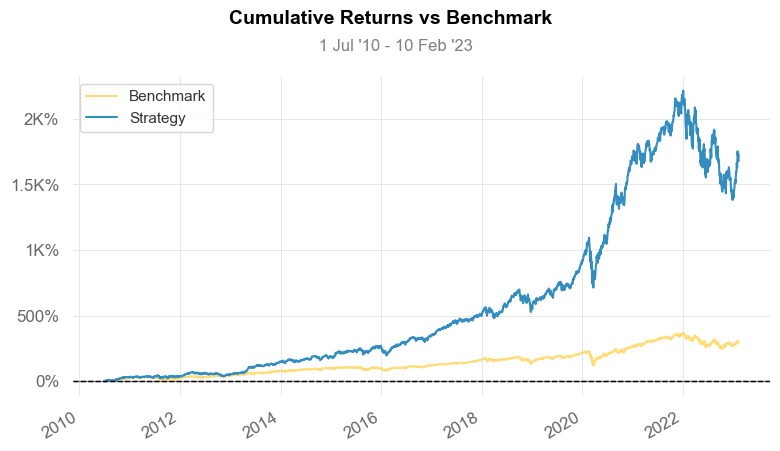

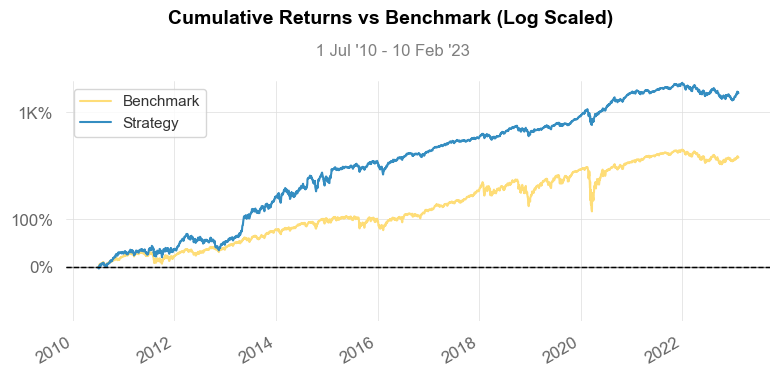

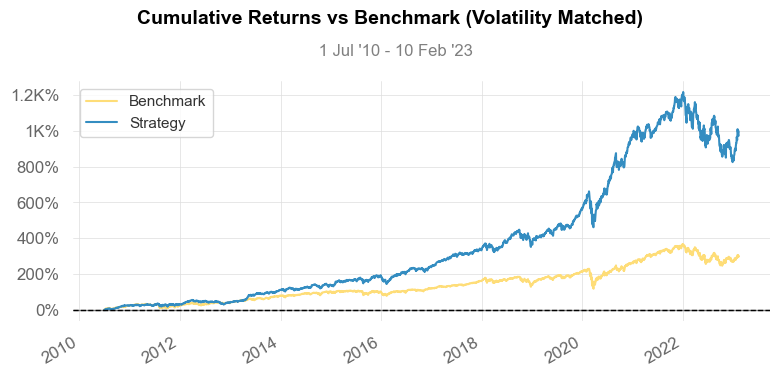

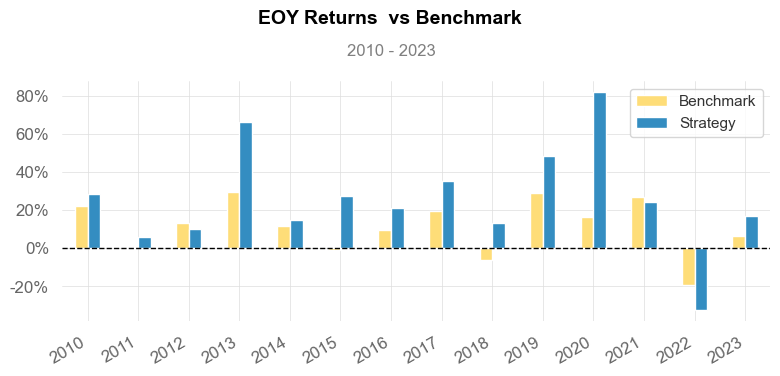

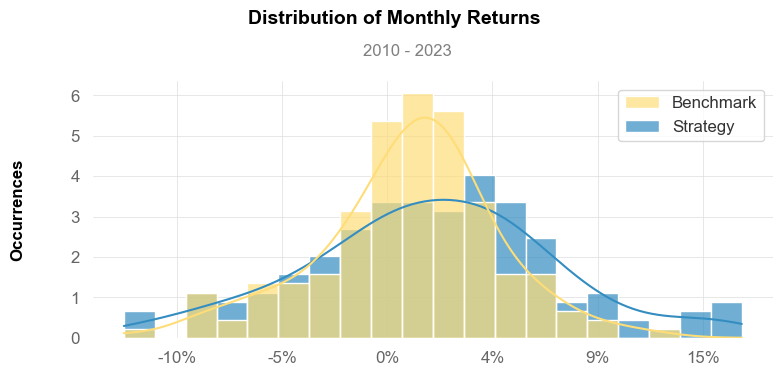

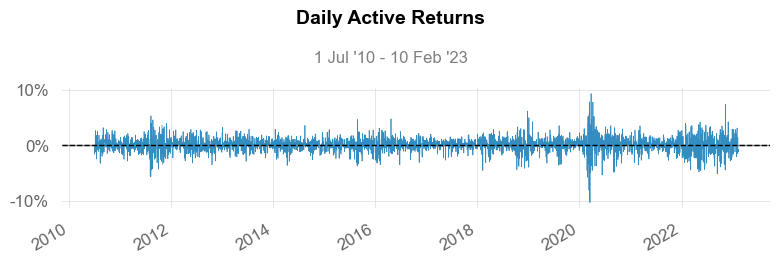

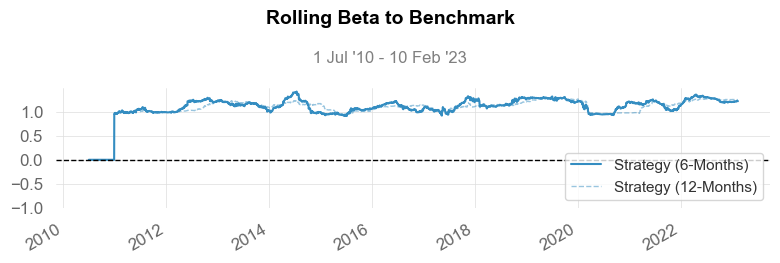

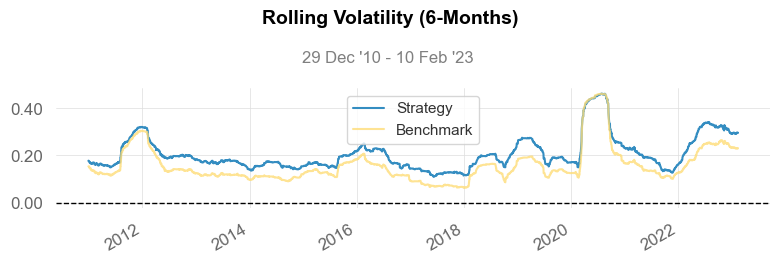

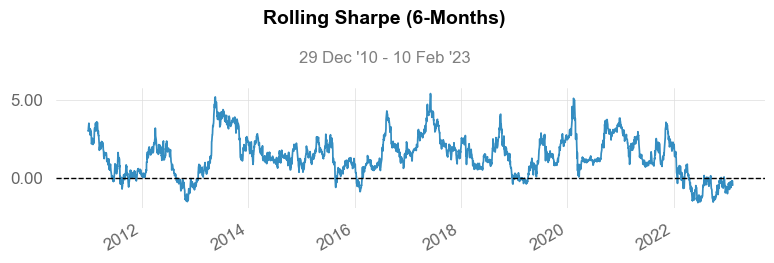

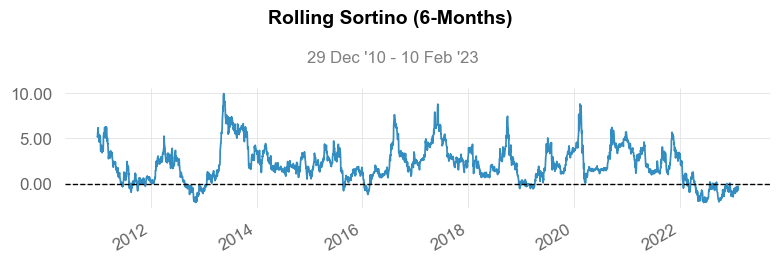

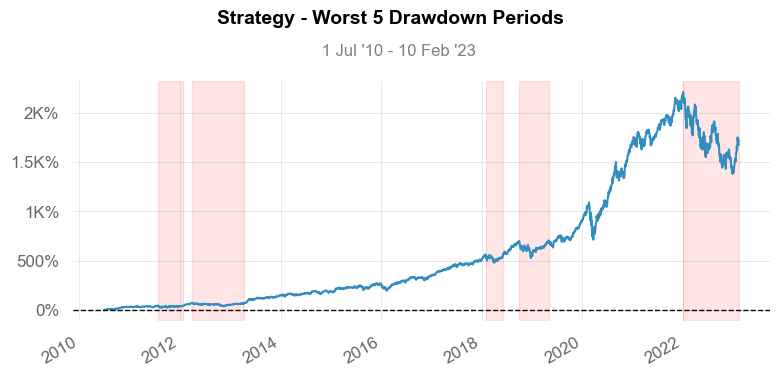

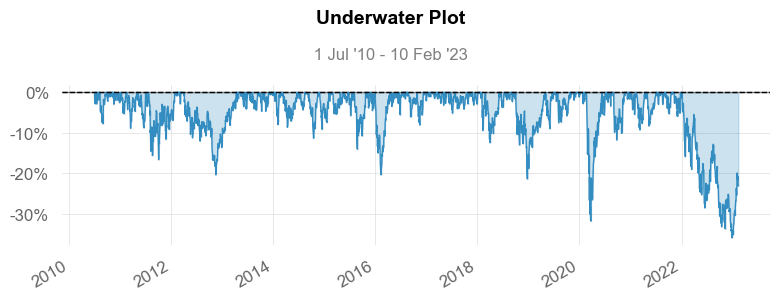

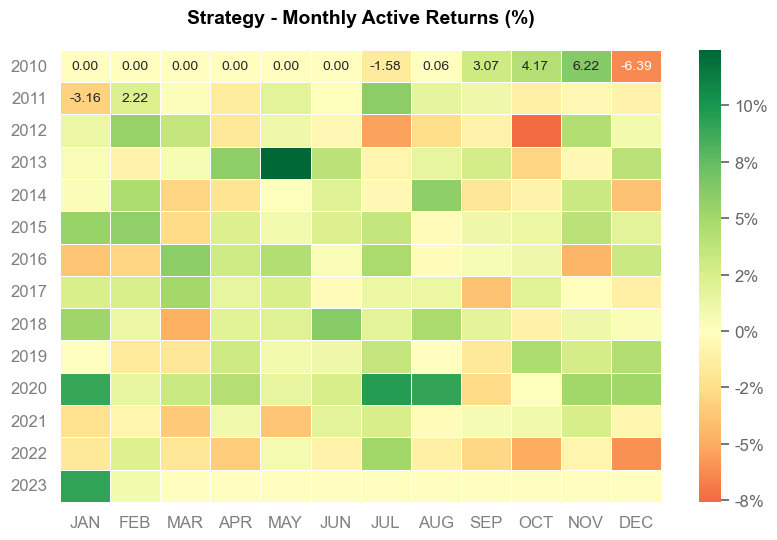

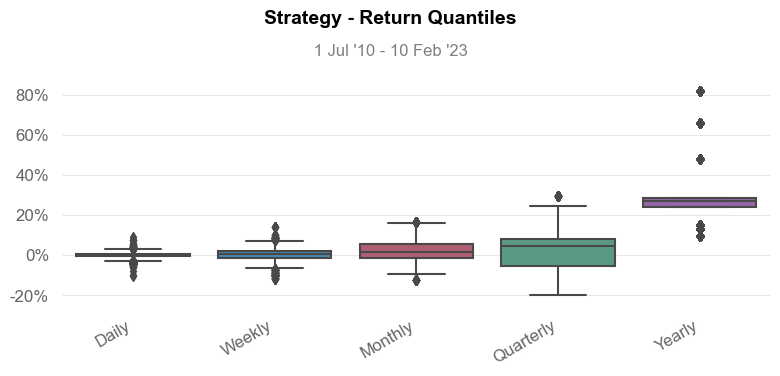

In [5]:
# Generating report on portfolio performance
qs.reports.full(portfolio, benchmark=sp500)

# Benchmark here is sp500 index
# Strategy is our portfolio

The analysis presents a range of indicators and visualizations to provide a thorough evaluation of portfolio performance. First, looking at the Cumulative Return, our portfolio beats the benchmark by a wide margin, generating an astounding 1,677.92% compared to the modest 296.86% for the SP500. Together with better Sharpe and Sortino Ratios, our portfolio outperforms the benchmark in terms of return per unit of risk.


Moreover, the portfolio beats the SP500 in the peak performance criteria (best day, month, and year) and all predicted return metrics (daily, monthly, and yearly). This indicates the portfolio's higher earning potential.


In contrast, the portfolio does show times of higher loss in comparison to the SP500, with a higher Maximum Drawdown of -36.01% compared to the benchmark's -33.92%. A higher annualized volatility of 21.89% is also seen, suggesting a riskier investment style.


Moreover, the portfolio's extreme performance on its worst day, month, and year exceeds the downturns seen in the benchmark, adding to the risk considerations. With a beta of 1.09, the portfolio's volatility stands at roughly 9% above the market average.


In conclusion, even though our portfolio has produced impressive returns, there is a greater degree of risk and volatility involved. This brings up a crucial point for portfolio optimization, which aims to balance return maximization and risk minimization.

Now we will use adjusted close prices to calculate the portfolio's value over time.

In [6]:
# Downloading data for each stock from yahoo finance
aapl_df = yf.download('AAPL', start='2010-07-01', end='2023-02-12')
tsla_df = yf.download('TSLA', start='2010-07-01', end='2023-02-12')
dis_df = yf.download('DIS', start='2010-07-01', end='2023-02-12')
mnst_df = yf.download('MNST', start='2010-07-01', end='2023-02-12')
amd_df = yf.download('AMD', start='2010-07-01', end='2023-02-12')
goog_df = yf.download('GOOG', start='2010-07-01', end='2023-02-12')
ko_df = yf.download('KO', start='2010-07-01', end='2023-02-12')
amzn_df = yf.download('AMZN', start='2010-07-01', end='2023-02-12')
visa_df = yf.download('V', start='2010-07-01', end='2023-02-12')
sony_df = yf.download('SONY', start='2010-07-01', end='2023-02-12')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
# Getting only the adjusted close price for each stock
aapl_df = aapl_df['Adj Close']
tsla_df = tsla_df['Adj Close']
dis_df = dis_df['Adj Close']
mnst_df = mnst_df['Adj Close']
amd_df = amd_df['Adj Close']
goog_df = goog_df['Adj Close']
ko_df = ko_df['Adj Close']
amzn_df = amzn_df['Adj Close']
visa_df = visa_df['Adj Close']
sony_df = sony_df['Adj Close']

In [8]:
# Merging and creating an Adj Close dataframe for stocks
df = pd.concat([aapl_df, tsla_df, dis_df, mnst_df, amd_df, goog_df,
               ko_df, amzn_df, visa_df, sony_df], join='outer', axis=1)
df.columns = ['aapl', 'tsla', 'dis', 'mnst',
              'amd', 'goog', 'ko', 'amzn', 'visa', 'sony']
df  # Visualizing dataframe for input

,aapl,tsla,dis,mnst,amd,goog,ko,amzn,visa,sony
Date,,,,,,,,,,
2010-07-01,7.512966,1.464000,27.339621,3.272500,7.390000,10.946221,16.495850,5.548000,16.498795,26.340000
2010-07-02,7.466403,1.280000,27.244120,3.343333,7.170000,10.872995,16.502449,5.457000,16.571257,26.360001
2010-07-06,7.517500,1.074000,27.539309,3.396667,7.040000,10.861040,16.627741,5.503000,16.365189,26.879999
2010-07-07,7.821067,1.053333,28.772148,3.474167,7.390000,11.212971,16.970654,5.671500,16.942625,27.049999
2010-07-08,7.803531,1.164000,28.945789,3.503333,7.370000,11.371377,17.283886,5.811000,17.001503,27.780001
...,...,...,...,...,...,...,...,...,...,...
2023-02-06,150.694321,194.759995,109.513092,51.410000,83.680000,103.470001,58.329739,102.180000,227.208664,90.120003
2023-02-07,153.594391,196.809998,111.267365,51.255001,85.910004,108.040001,58.232796,102.110001,229.070389,91.370003
2023-02-08,150.883026,201.289993,111.416878,51.044998,84.690002,100.000000,57.893505,100.050003,227.961288,90.419998


The dataframe above will be used as input for the algorithms to optimize the portfolio

In [9]:
# Importing libraries for portfolio optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

## Markowitz Mean-Variance Optimization Model

One popular method for creating portfolios with the best risk-return ratio is the Markowitz Mean-Variance Optimization Model. It depends on the idea that investors ought to minimize a portfolio's risk in order to optimize its anticipated return. To put this idea into practice, PyPortfolioOpt will be used.


Nonetheless, mean-variance optimization requires the following two essential conditions:


1. The predicted returns for each asset in the portfolio must first be determined.
2. Second, a risk model that measures the degree of risk associated with each asset must be selected. The covariance matrix, which illustrates asset volatilities and the extent of codependency, is the most often used risk model.


Let's take it all step by step.

In [10]:
# Calculating the annualized expected returns and the annualized sample covariance matrix
ann_exp_ret = expected_returns.mean_historical_return(df)  # expected returns
cov_m = risk_models.sample_cov(df)  # Covariance matrix

In [11]:
# Visualizing the annualized expected returns
ann_exp_ret

aapl    0.268385
tsla    0.475549
dis     0.114966
mnst    0.244323
amd     0.209862
goog    0.186956
ko      0.104636
amzn    0.255579
visa    0.230636
sony    0.102554
dtype: float64

In [12]:
# Visualizing the covariance matrix
cov_m

,aapl,tsla,dis,mnst,amd,goog,ko,amzn,visa,sony
aapl,0.081699,0.058321,0.031096,0.028960,0.063529,0.043819,0.017712,0.046153,0.036512,0.035483
tsla,0.058321,0.329160,0.043762,0.034208,0.101222,0.052146,0.018979,0.066805,0.043732,0.045588
dis,0.031096,0.043762,0.068223,0.027766,0.047868,0.033463,0.021129,0.034437,0.035941,0.032324
mnst,0.028960,0.034208,0.027766,0.103038,0.039991,0.029351,0.024488,0.033133,0.030435,0.027787
amd,0.063529,0.101222,0.047868,0.039991,0.326817,0.054460,0.022196,0.068967,0.052375,0.059929
goog,0.043819,0.052146,0.033463,0.029351,0.054460,0.074527,0.017670,0.054645,0.038137,0.034072
ko,0.017712,0.018979,0.021129,0.024488,0.022196,0.017670,0.030650,0.015113,0.020844,0.017365
amzn,0.046153,0.066805,0.034437,0.033133,0.068967,0.054645,0.015113,0.109615,0.038217,0.036038
visa,0.036512,0.043732,0.035941,0.030435,0.052375,0.038137,0.020844,0.038217,0.066343,0.033090
sony,0.035483,0.045588,0.032324,0.027787,0.059929,0.034072,0.017365,0.036038,0.033090,0.104795


In [13]:
# Optimizing for maximal Sharpe ratio
# Providing expected returns and covariance matrix as input
eff_front = EfficientFrontier(ann_exp_ret, cov_m)
# Optimizing weights for Sharpe ratio maximization
weights = eff_front.max_sharpe()

# clean_weights rounds the weights and clips near-zeros
clean_weights = eff_front.clean_weights()

# Printing optimized weights and expected performance for portfolio
clean_weights

OrderedDict([('aapl', 0.28318),
             ('tsla', 0.16794),
             ('dis', 0.0),
             ('mnst', 0.22189),
             ('amd', 0.0),
             ('goog', 0.0),
             ('ko', 0.0),
             ('amzn', 0.07249),
             ('visa', 0.2545),
             ('sony', 0.0)])

After the model's implementation, the composition of the portfolio has changed, with 28.32% of its allocation going into Apple shares, 16.79% into Tesla, 22.2% into Microsoft, 7.25% into Amazon, and 24.45% into Sony. The remaining stocks are abandoned since they are considered to be non-profit.


Now that we have the optimized weights, we can build a new portfolio and apply Quantstats to evaluate how successfully it performe in comparison to the earlier portfolio.

In [17]:
# Creating a new portfolio with optimized proportion of the stocks
new_weights = [0.28318, 0.16794, 0.22189, 0.07249, 0.2545]
optimized_portfolio = aapl*new_weights[0] + \
    tsla*new_weights[1] + mnst*new_weights[2] + amzn*new_weights[3] + visa*new_weights[4]
optimized_portfolio  # Visualizing daily returns

Date
2010-07-01   -0.006987
2010-07-02   -0.018131
2010-07-06   -0.024104
2010-07-07    0.024466
2010-07-08    0.021540
                ...   
2023-02-06   -0.000240
2023-02-07    0.008584
2023-02-08   -0.004780
2023-02-09    0.002474
2023-02-10   -0.011145
Name: Close, Length: 3176, dtype: float64

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-07-01   2010-07-01
End Period                 2023-02-10   2023-02-10
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          1,677.92%    3,267.10%
CAGR﹪                     17.05%       21.21%

Sharpe                     1.15         1.3
Prob. Sharpe Ratio         100.0%       100.0%
Smart Sharpe               1.07         1.21
Sortino                    1.65         1.9
Smart Sortino              1.54         1.77
Sortino/√2                 1.17         1.35
Smart Sortino/√2           1.09         1.25
Omega                      1.26         1.26

Max Drawdown               -36.01%      -33.97%
Longest DD Days            403          403
Volatility (ann.)          21.89%       23.66%
R^2                        0.86         0.86
Information Ratio          0.04         0.04
Calmar            

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2020-03-23,2020-05-29,100,-33.966121,-32.261320
2,2022-01-04,2023-01-03,2023-02-10,403,-29.251506,-28.633718
3,2015-12-02,2016-02-08,2016-08-04,247,-23.171287,-22.888104
4,2018-10-02,2018-12-24,2019-05-02,213,-21.878854,-19.598381
5,2020-09-02,2020-10-30,2020-11-30,90,-14.652884,-13.685361


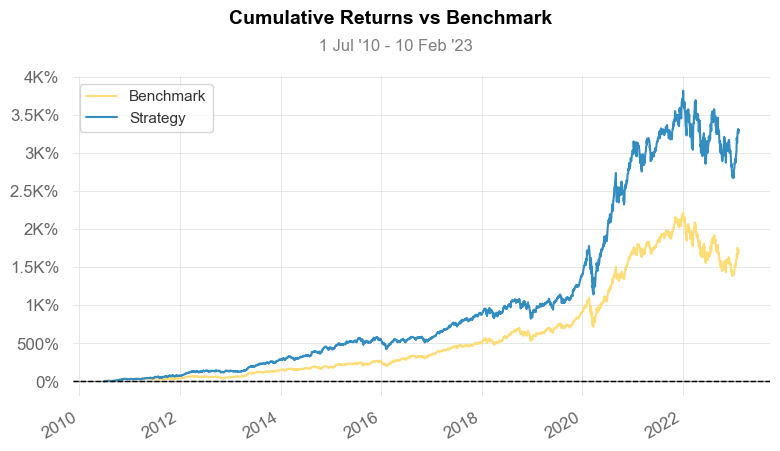

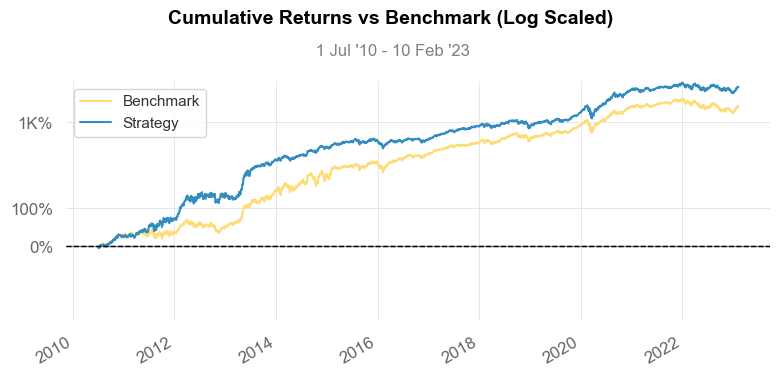

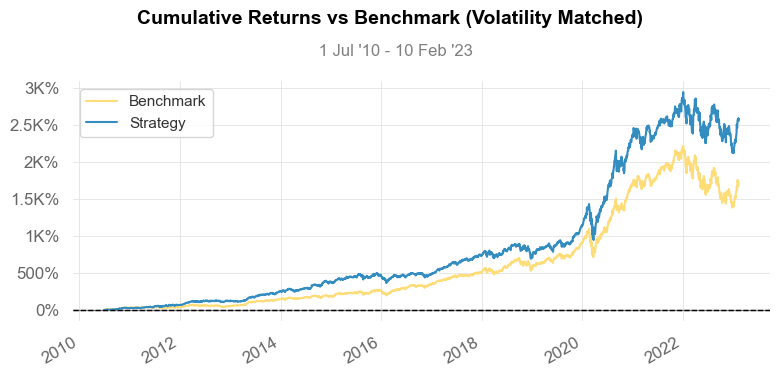

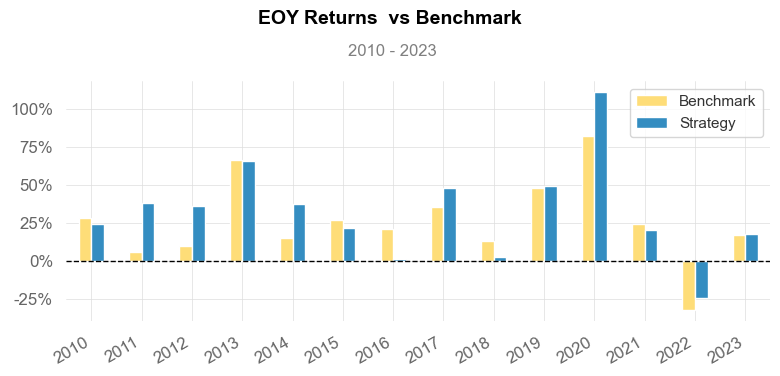

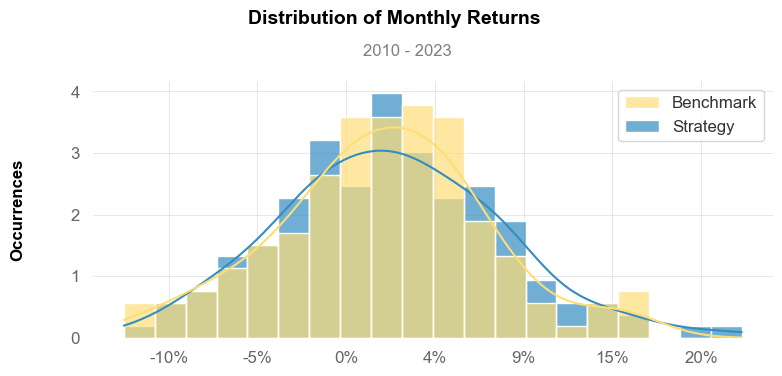

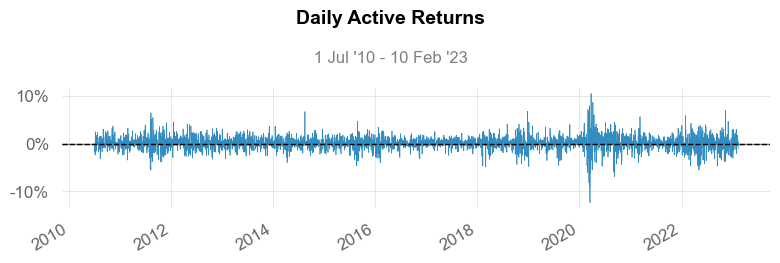

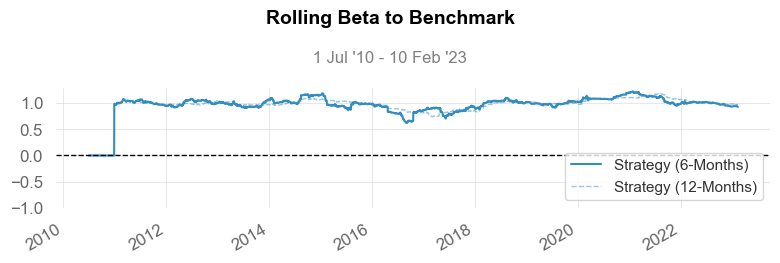

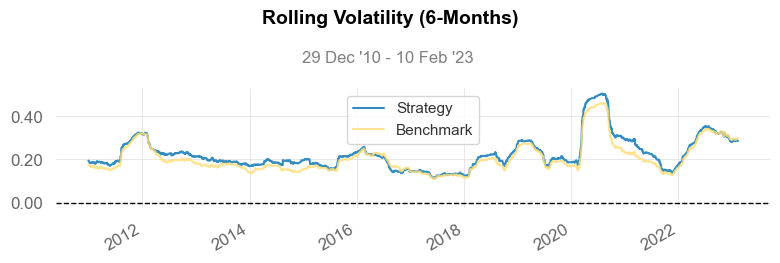

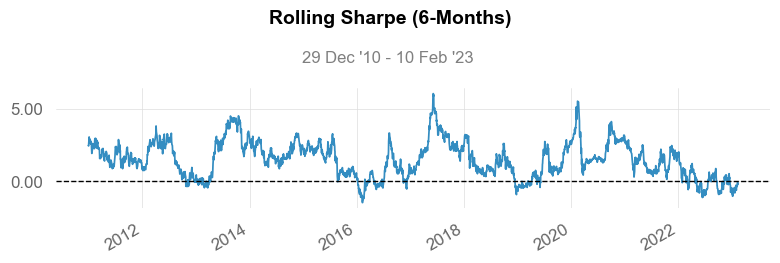

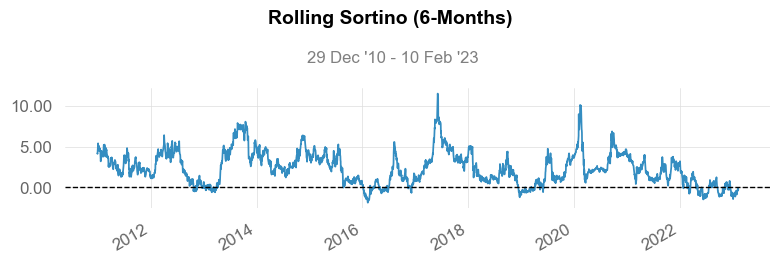

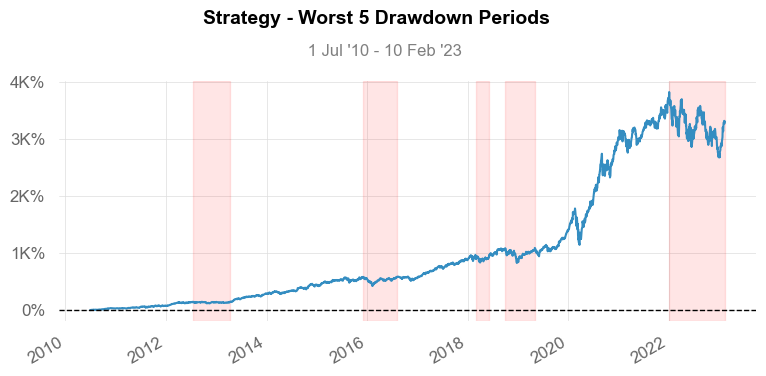

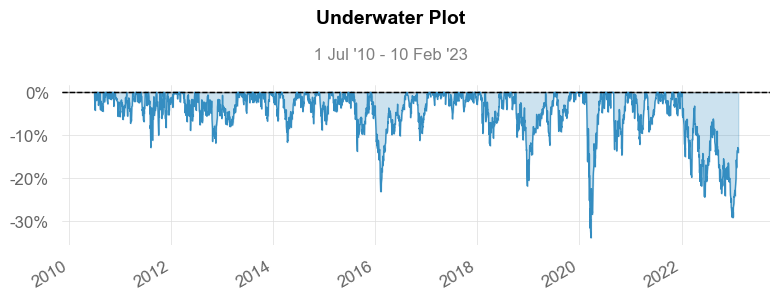

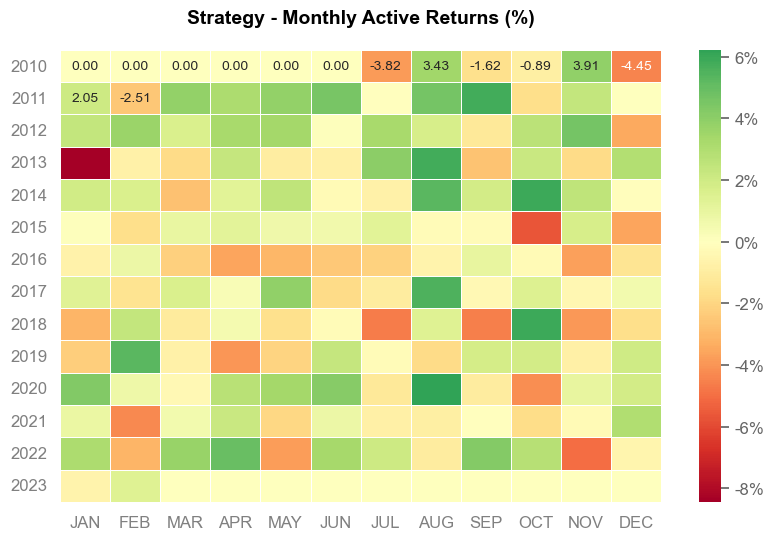

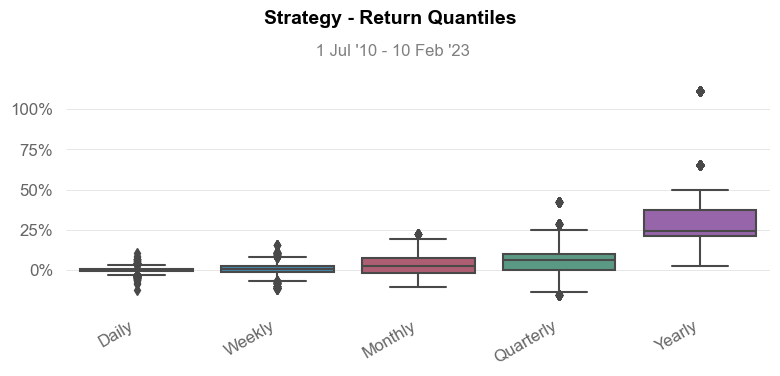

In [18]:
# Displaying new reports comparing the optimized portfolio to the first portfolio constructed
qs.reports.full(optimized_portfolio, benchmark=portfolio)

## Improved Performance Perspectives

- **Superior Returns:** With an astounding cumulative return of 3,267.10%, the optimized portfolio has beaten the original by an impressive margin, surpassing its 1,677.92% return. This illustrates how investors' earnings can be increased over the same period by the optimized portfolio.
- **Growth Over Time:** The optimized portfolio shows a strong yearly increase compared to the original portfolio's 17.05%, with a Compounded Annual Growth Rate (CAGR) of 21.21%, guaranteeing a more profitable investing path.

### Risk-Adjusted Returns & Market Volatility

- **Sharpe Ratio:** The optimized portfolio outperforms the original with a Sharpe ratio of 1.3, outperforming it by 1.15. Better risk-adjusted returns are shown by this, emphasizing more intelligent risk management.
- **Market Sensitivity (Beta):** With a beta of 1.0, the optimized portfolio exhibits the same volatility compared to the broader market and shows a marked improvement in stability over the original portfolio.

### Drawdown and Recovery Dynamics

- **Mitigated Losses:** The optimized portfolio's resilience, sustaining fewer losses during downturns, is indicated by the greatest drawdown reduction to -33.97% from -36.01%. Although the shift isn't as big as it was in the last portfolio, it's still less than what the SP 500 index had.
- **Swift Recovery:** The optimized portfolio's recovery factor increases by 29% when compared to the original one, demonstrating exceptional recovery capabilities. This illustrates how quickly it recovered from setbacks to generate more profits.

### Consistency and Volatility

- **Win Rates:** The optimized portfolio edges out with higher win rates across days, months, quarters, and years, suggesting a consistent ability to yield positive outcomes.